In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.1 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import mne

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
''';sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw = raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')
'''

";sample_data_folder = mne.datasets.sample.data_path()\nsample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')\nraw = mne.io.read_raw_fif(sample_data_raw_file)\nraw = raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')\n"

In [ ]:
signal_dir = "s01.bdf"

In [ ]:
raw = mne.io.read_raw_bdf(signal_dir, preload=True)

Extracting EDF parameters from /content/s01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-05342998523d>:1: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_bdf(signal_dir, preload=True)


Reading 0 ... 458239  =      0.000 ...   894.998 secs...


In [ ]:
raw.info

Measurement date,"July 01, 2010 10:00:16 GMT"
Experimenter,Unknown
Participant,s01
Digitized points,Not available
Good channels,"47 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,104.00 Hz


In [ ]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 47 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2010-07-01 10:00:16 UTC
 nchan: 48
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>


Using matplotlib as 2D backend.


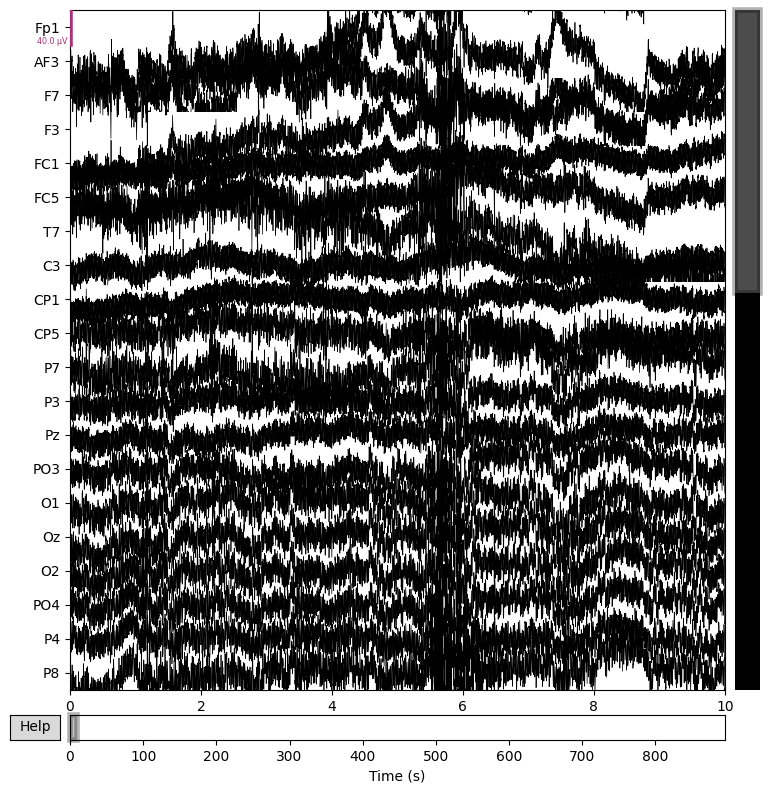

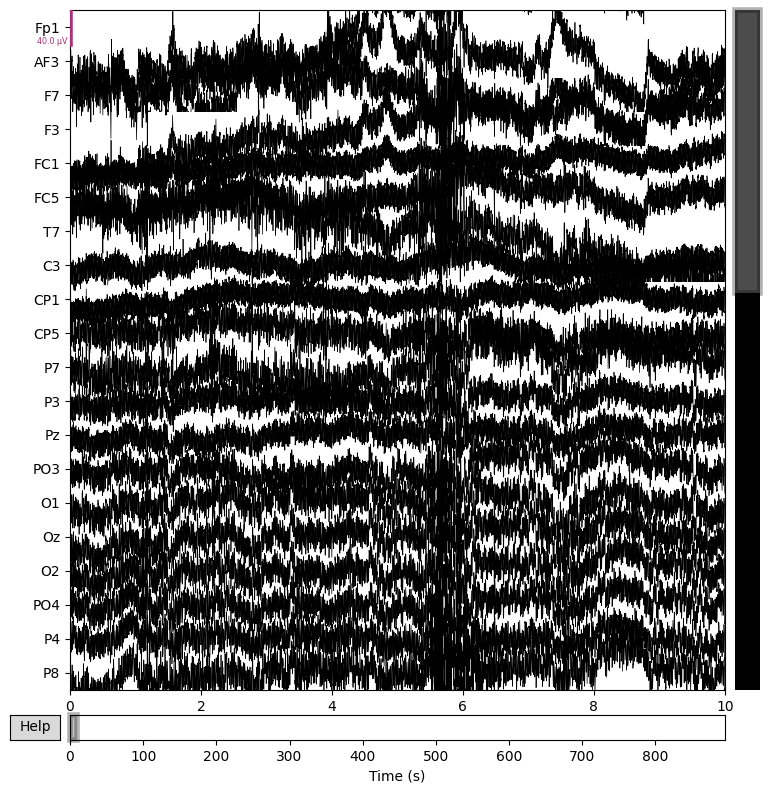

In [ ]:
raw.plot(title='Raw EEG Data')

In [ ]:
print(raw.info['ch_names'])

['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']


In [ ]:
# Define the channels you want to keep
channels_of_interest = ['Fp1', 'AF3', 'F7', 'F3']

# Pick only the channels of interest
raw.pick_channels(channels_of_interest)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Measurement date,"July 01, 2010 10:00:16 GMT"
Experimenter,Unknown
Participant,s01
Digitized points,Not available
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,104.00 Hz


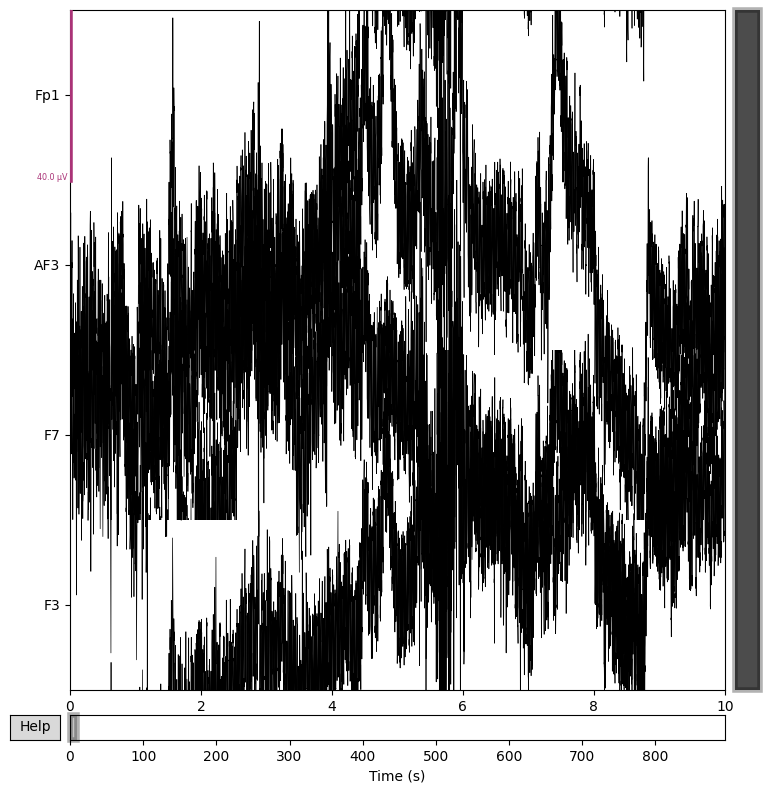

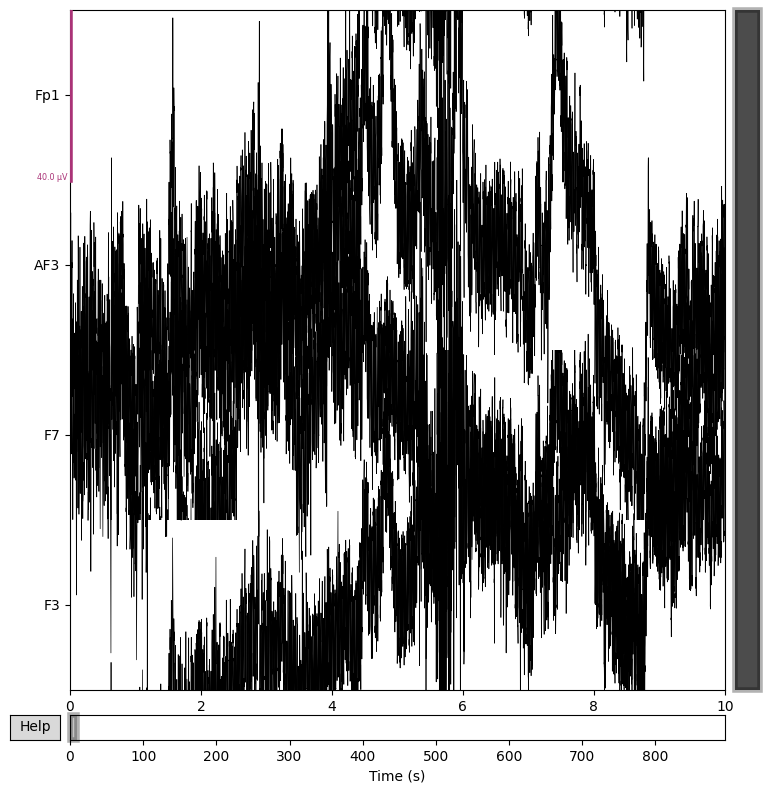

In [ ]:
raw.plot(title='Selected Frontal Channels')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
['F7']


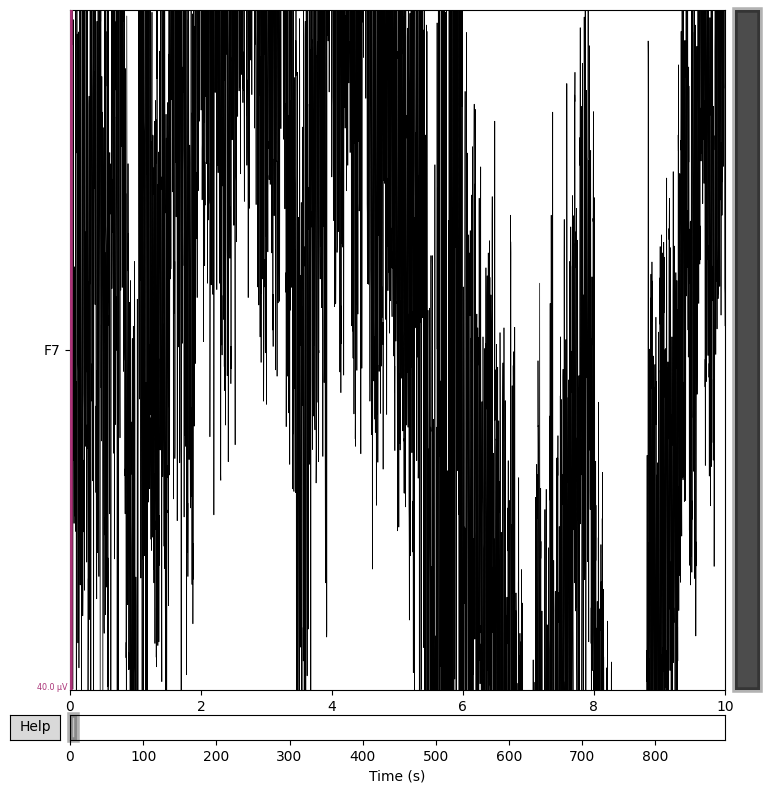

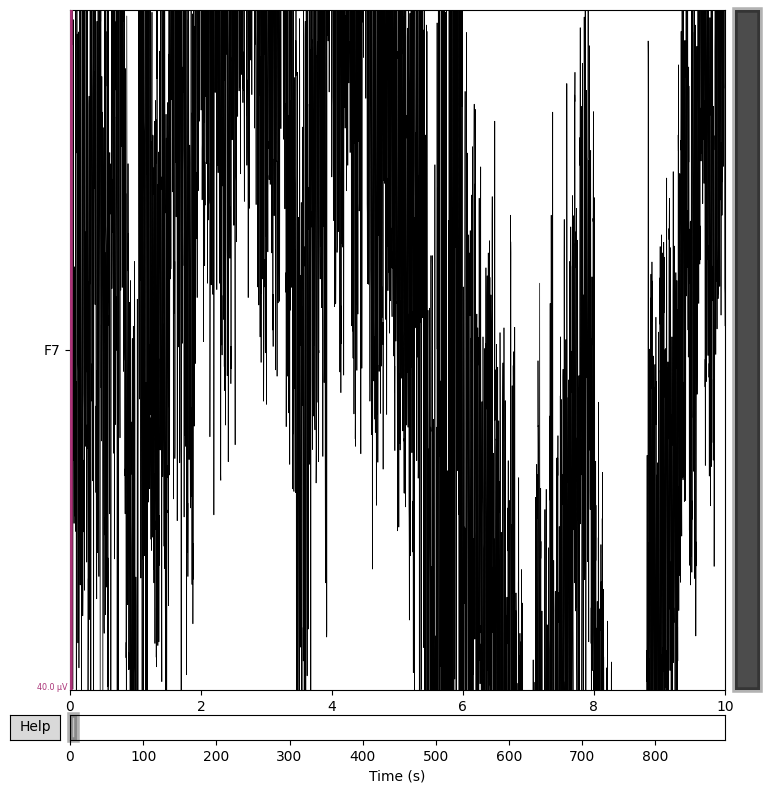

In [ ]:
# Select only the 'F7' channel
raw_f7 = raw.copy().pick_channels(['F7'])

# Verify the selected channel in the new Raw object
print(raw_f7.info['ch_names'])

# Plot the raw data of the selected channel
raw_f7.plot(title='Channel F7')

In [ ]:
n_samples = raw_f7.n_times
sfreq = raw_f7.info['sfreq']

# Calculate the duration in seconds
duration_seconds = n_samples / sfreq

print(f"Duration of the 'F7' channel: {duration_seconds:.2f} seconds")

Duration of the 'F7' channel: 895.00 seconds


In [ ]:
# Select only the 'Stimulus' channel
#aw_stimulus = raw.copy().pick_channels(['Status'])

# Verify the selected channel in the new Raw object
#print(raw_stimulus.info['ch_names'])

# Plot the raw data of the selected stimulus channel
#raw_stimulus.plot(title='Stimulus Channel')

 22%|████████▏                            | 367M/1.65G [27:51<1:37:44, 219kB/s]


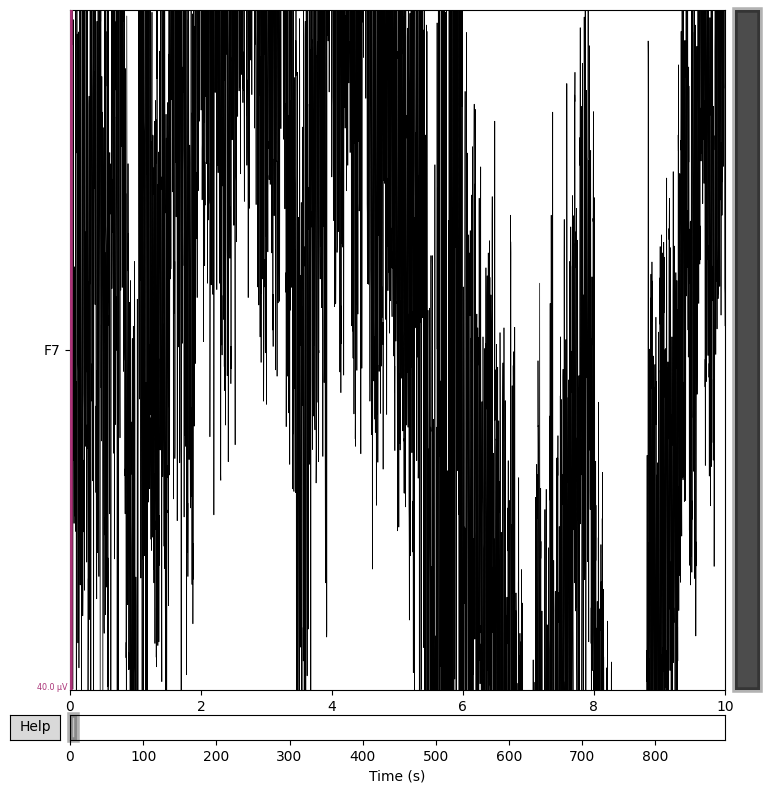

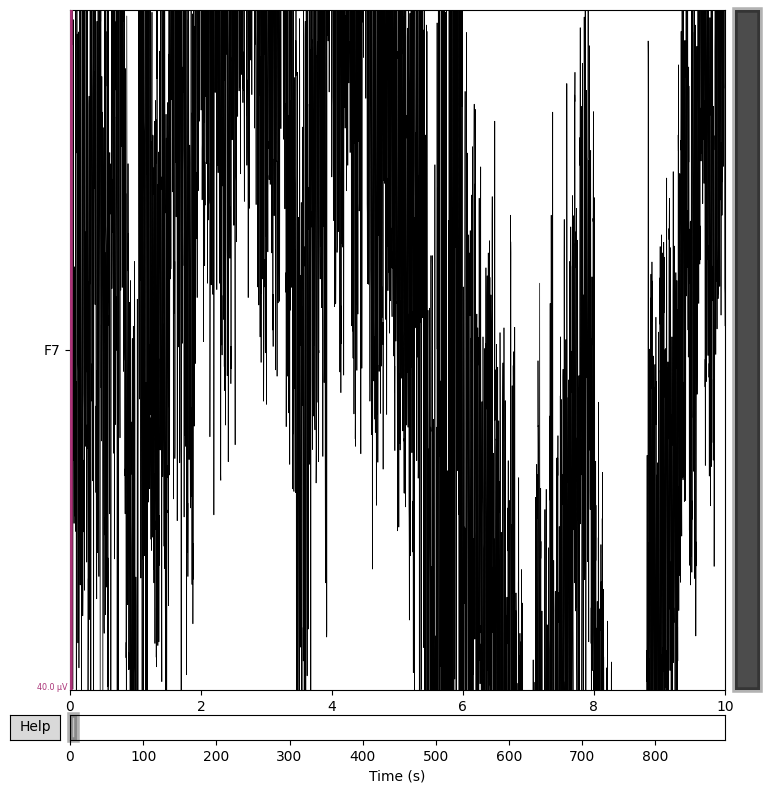

In [ ]:
start_time = 0  # Start time in seconds
end_time = 10   # End time in seconds

# Plot the data for the selected time window
raw_f7.plot(start=start_time, duration=end_time - start_time, title='F7 Channel')

**Smoothening EEG Channel**

Moving Average filter offers a
simple method to smooth the signal by averaging neighboring
data points while preserving the signal’s shape. It operates
by averaging a set of signal data points (window ) and
sliding this window across the signal to smooth out short term fluctuations.

- Here I have tried to smoothen the F7 channel from frontal lobe

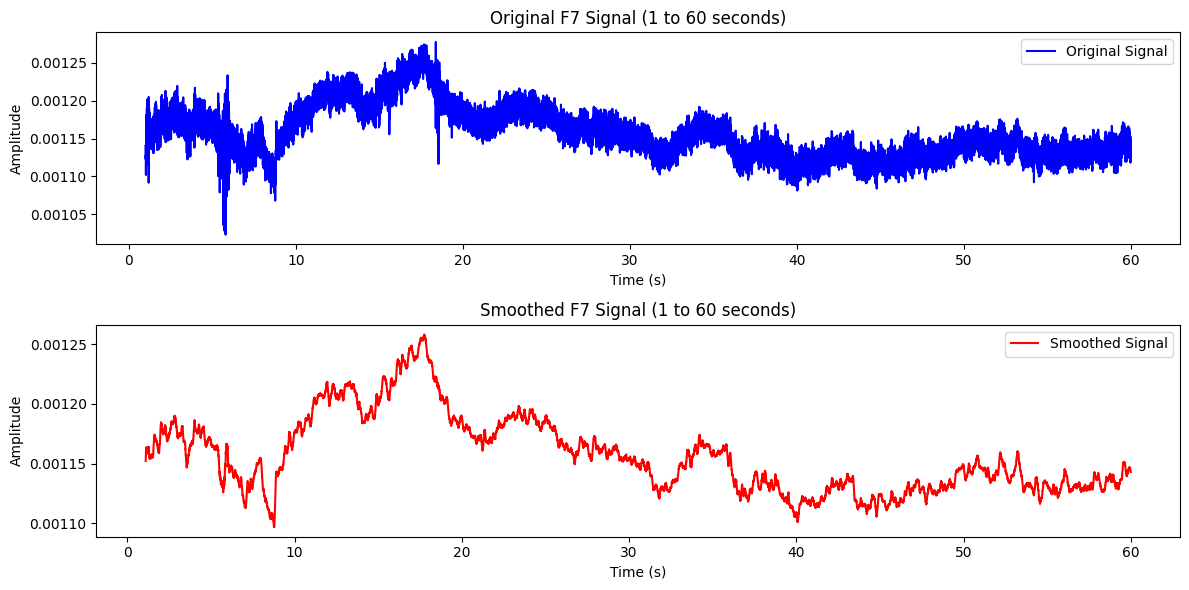

In [ ]:
start_time = 1  # Start time in seconds
end_time = 60   # End time in seconds

# Extract the data for the time window
data, times = raw_f7[:, int(start_time * raw_f7.info['sfreq']):int(end_time * raw_f7.info['sfreq'])]

# Define the moving average filter function
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Apply the moving average filter
window_size = 50  # Adjust window size as needed
smoothed_data = moving_average(data[0], window_size)

# Adjust the times for the smoothed data
smoothed_times = times[window_size - 1:]  # Align time array with smoothed data

# Plot the original and smoothed signals
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(times, data[0], label='Original Signal', color='blue')
plt.title('Original F7 Signal (1 to 60 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot smoothed data
plt.subplot(2, 1, 2)
plt.plot(smoothed_times, smoothed_data, label='Smoothed Signal', color='red')
plt.title('Smoothed F7 Signal (1 to 60 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

**Low pass Filter**

In [ ]:
from scipy import signal
from scipy.signal import welch
from scipy.fft import fft, fftfreq
#plt.rc('font',family='Times New Roman')
import warnings
warnings.filterwarnings('ignore')

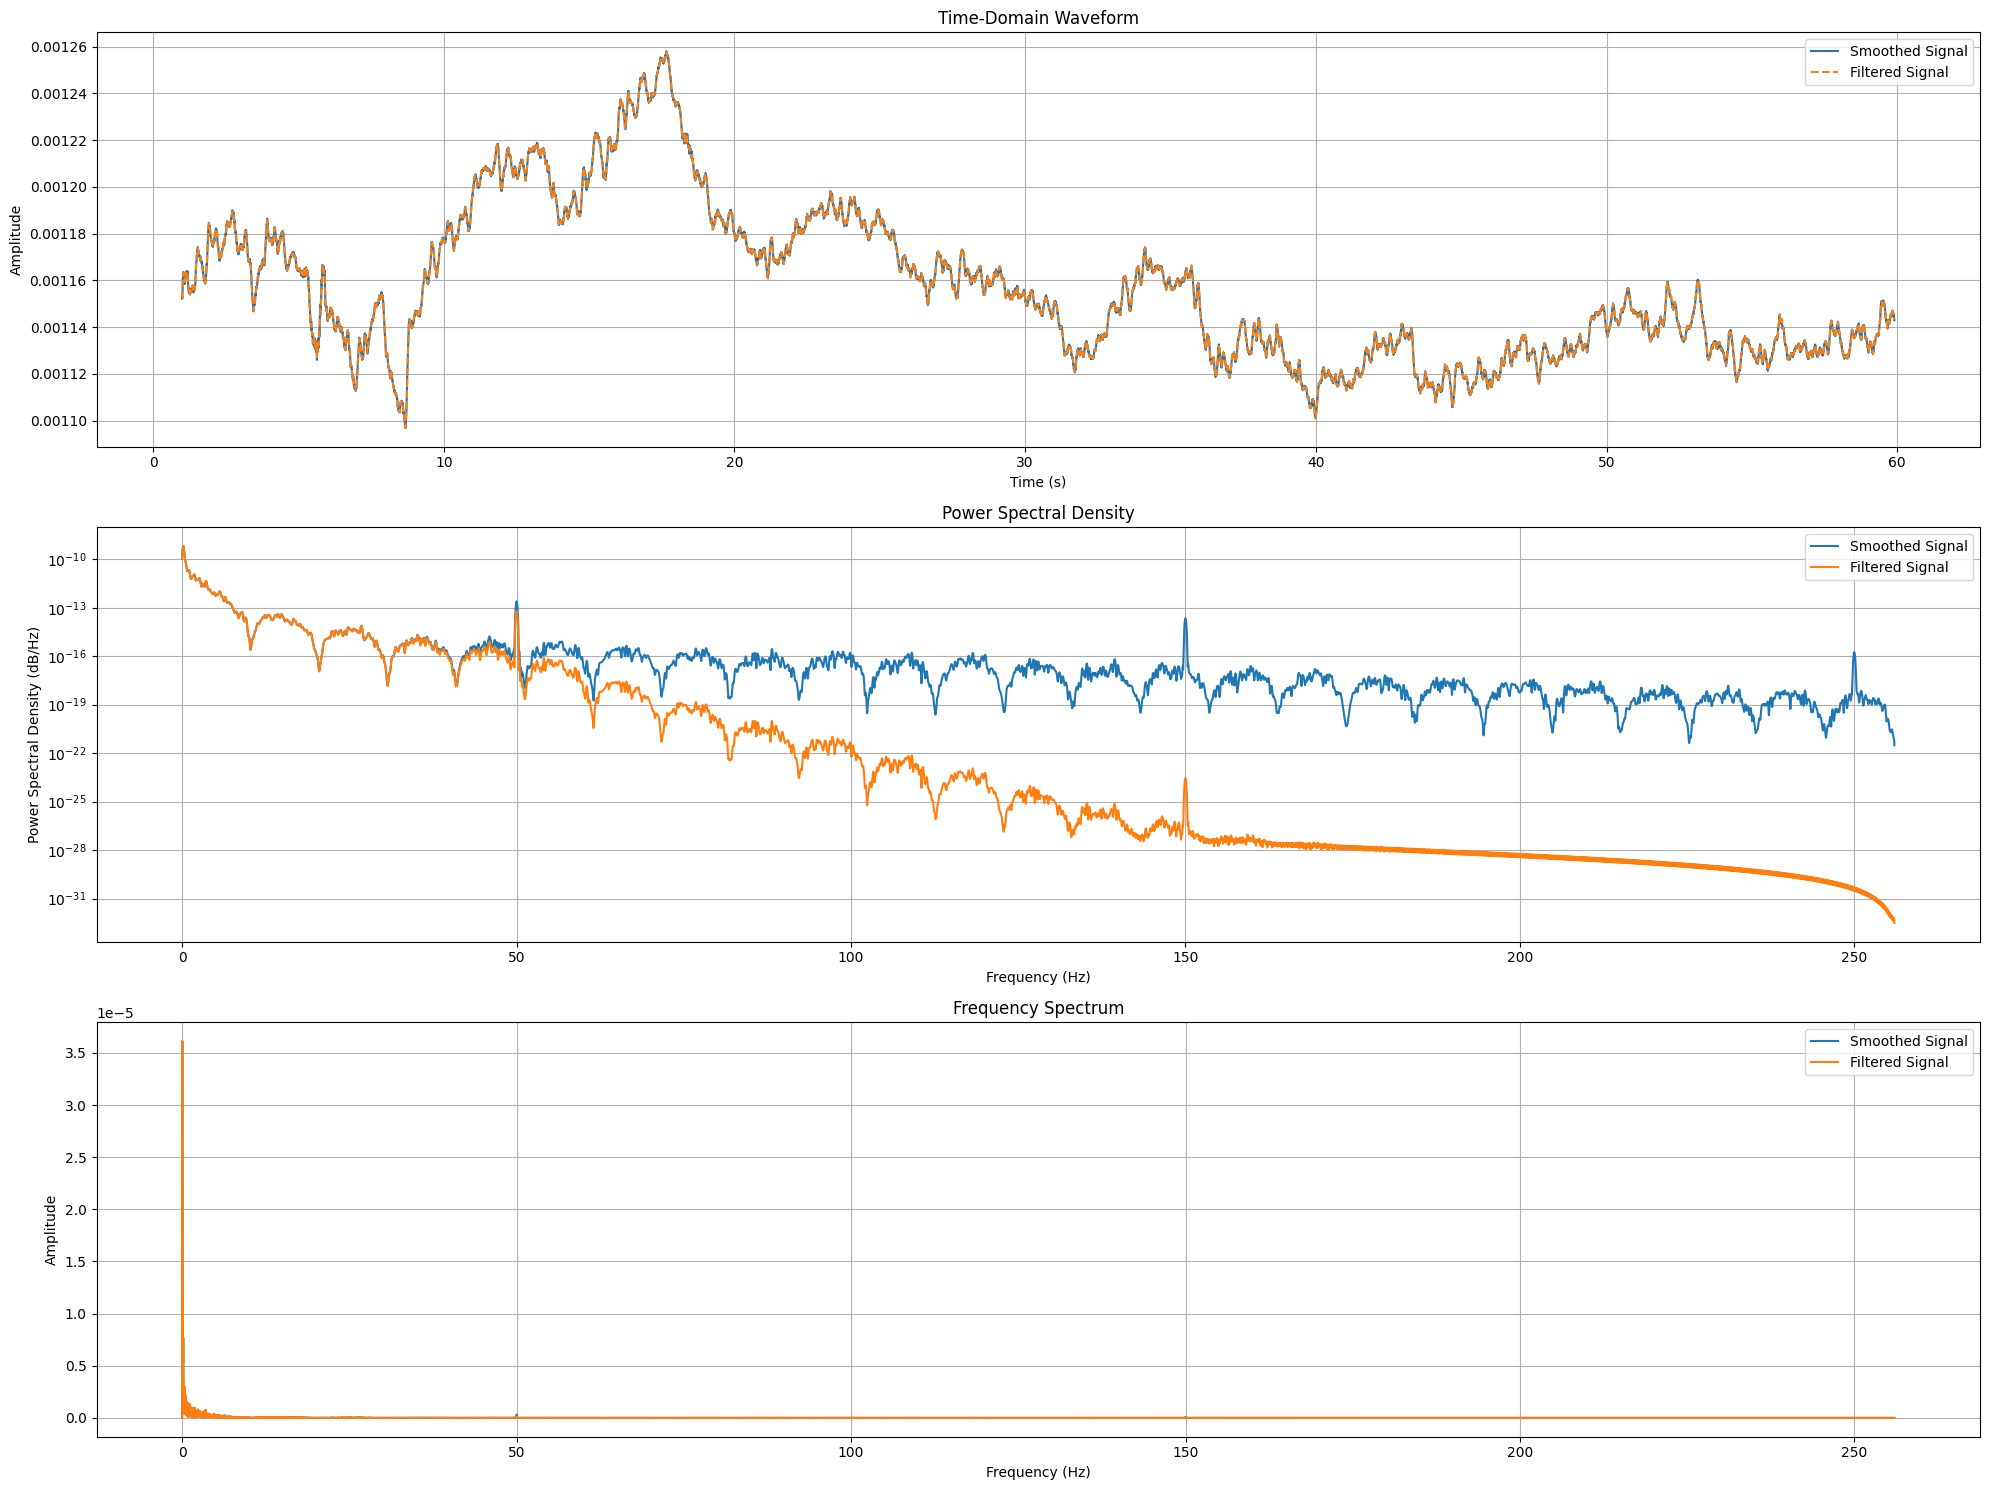

In [ ]:
# Apply a 4th-order Butterworth low-pass filter
fs = raw.info['sfreq']  # Sampling frequency
cutoff = 50  # Cutoff frequency in Hz
N = 4  # Filter order
b, a = butter(N, cutoff, fs=fs, btype='low', analog=False)
filtered_data = filtfilt(b, a, smoothed_data)

# Function to compute FFT
def apply_fft(x, fs):
    N = len(x)
    T = 1.0 / fs
    fft_coef = np.fft.fft(x - np.mean(x))
    xf = np.fft.fftfreq(N, T)[:N // 2]
    fft_positive = 2.0 / N * np.abs(fft_coef[:N // 2])
    return xf, fft_positive

# Function to compute PSD
def compute_psd(signal, fs):
    seg_length = len(signal) // 10
    overlap = seg_length // 20
    nfft_length = 2**14
    frequencies, psd = welch(signal, fs=fs, window='hann', nperseg=seg_length, noverlap=overlap, nfft=nfft_length)
    return frequencies, psd

# Compute PSD and FFT for raw and filtered signals
f_psd_raw, psd_raw = compute_psd(smoothed_data, fs)
f_psd_filtered, psd_filtered = compute_psd(filtered_data, fs)
f_fft_raw, fft_raw = apply_fft(smoothed_data, fs)
f_fft_filtered, fft_filtered = apply_fft(filtered_data, fs)

# Plotting
plt.figure(figsize=(20, 15))

# Time-domain waveform
plt.subplot(3, 1, 1)
plt.plot(times[:len(smoothed_data)], smoothed_data, label='Smoothed Signal')
plt.plot(times[:len(filtered_data)], filtered_data, label='Filtered Signal', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Waveform')
plt.legend()
plt.grid(True)

# PSD
plt.subplot(3, 1, 2)
plt.semilogy(f_psd_raw, psd_raw, label='Smoothed Signal')
plt.semilogy(f_psd_filtered, psd_filtered, label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density')
plt.legend()
plt.grid(True)

# Frequency spectrum
plt.subplot(3, 1, 3)
plt.plot(f_fft_raw, fft_raw, label='Smoothed Signal')
plt.plot(f_fft_filtered, fft_filtered, label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

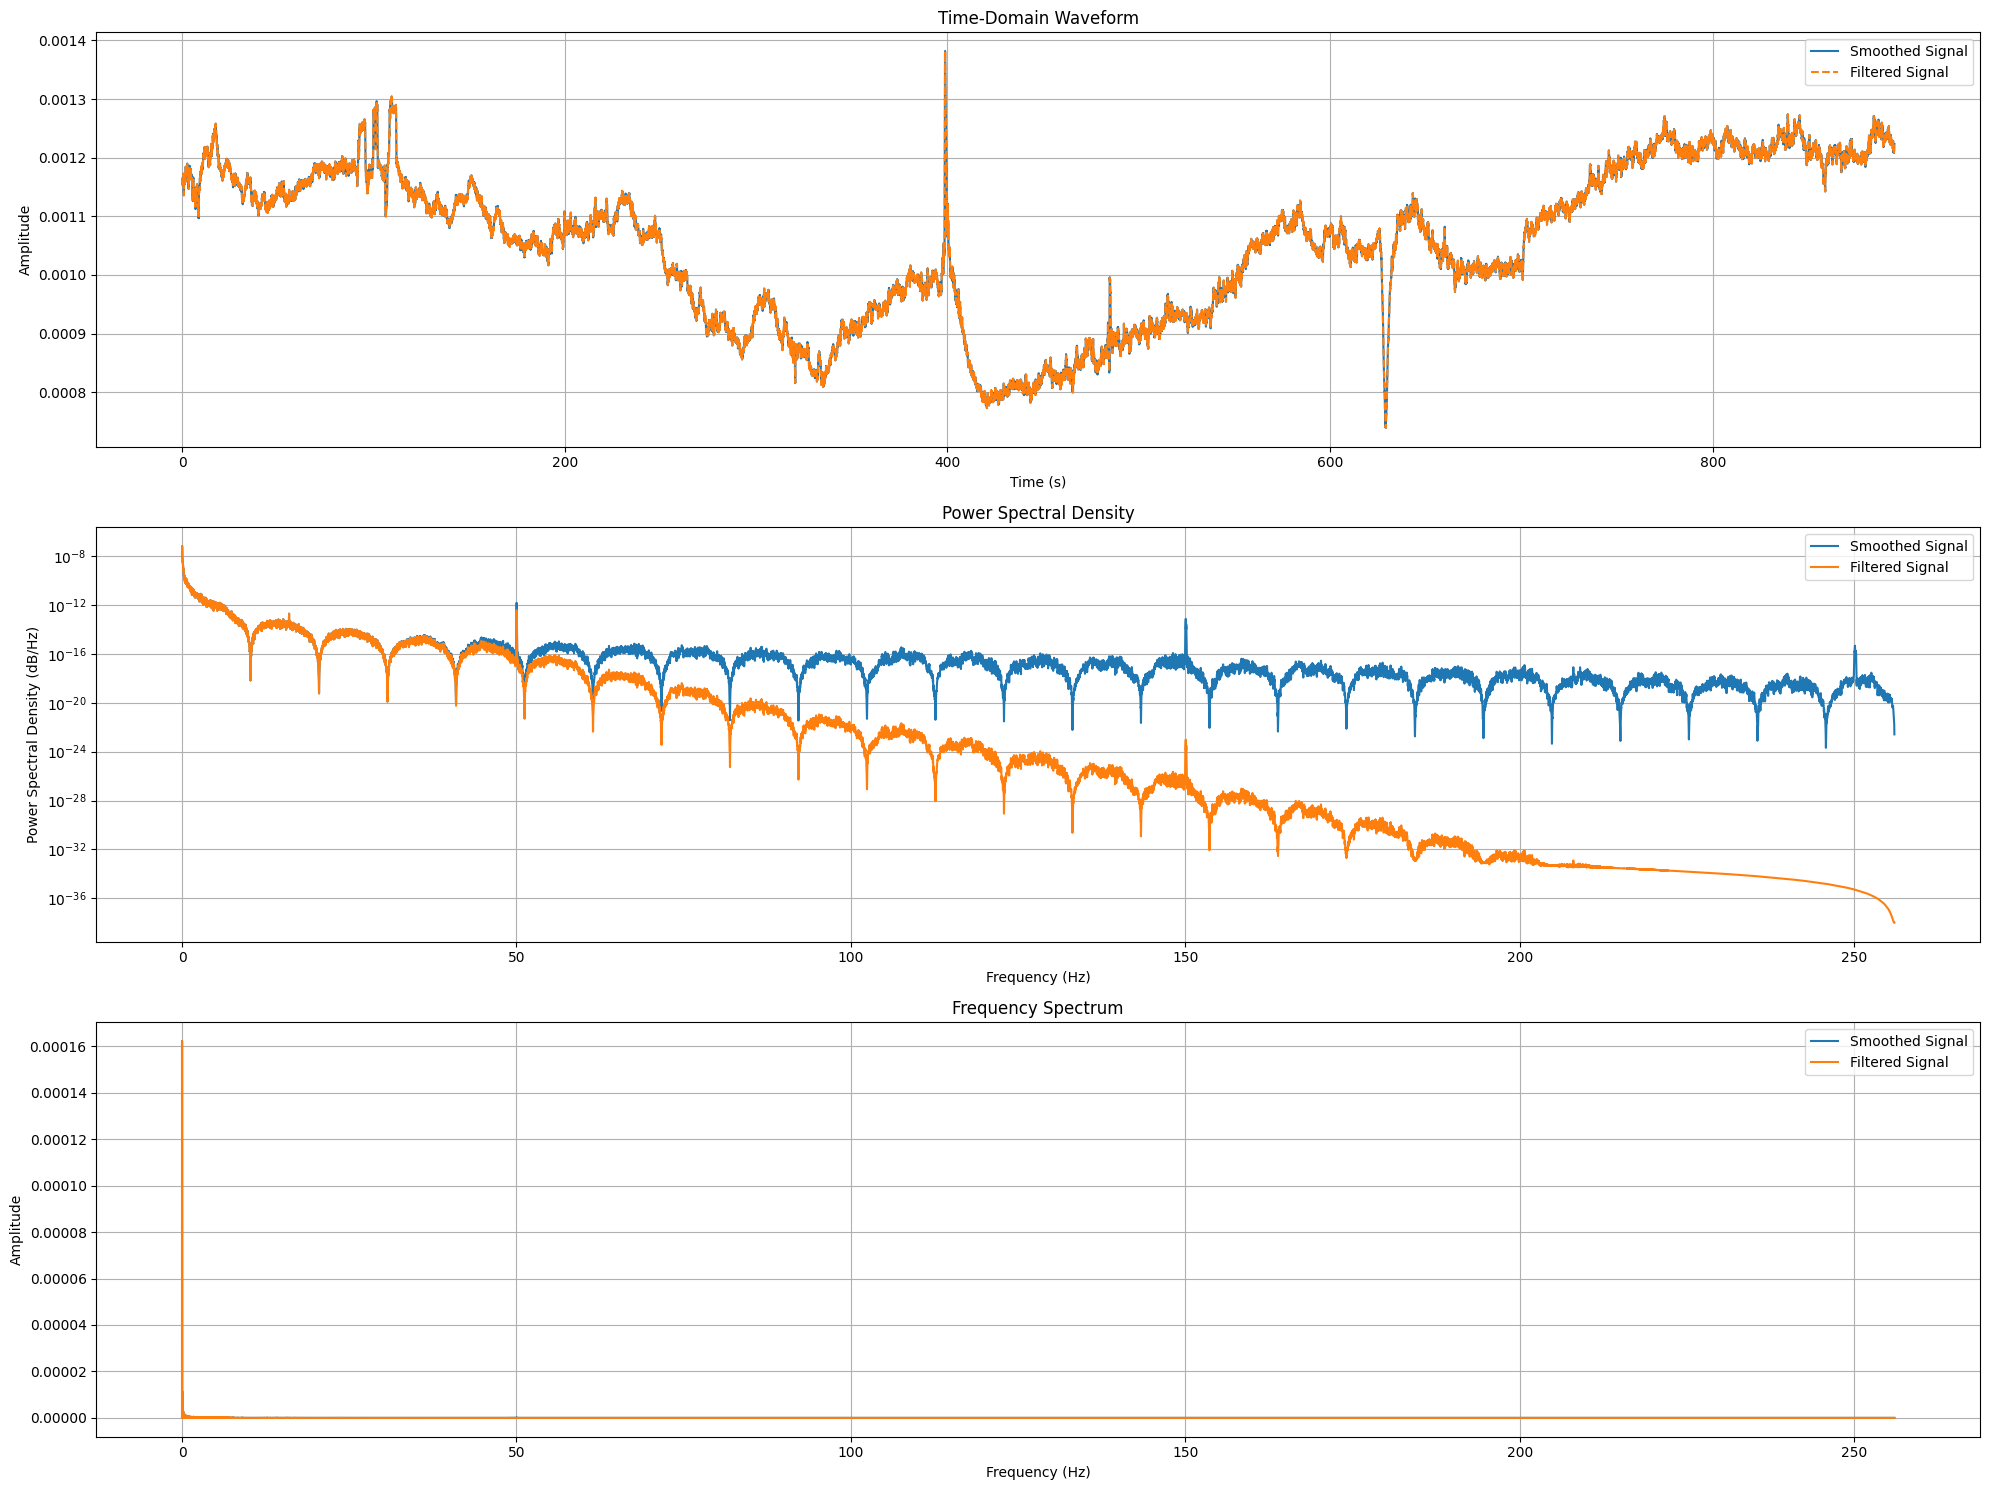

In [ ]:
data, times = raw_f7[:]  # Get all the data

# Define the moving average filter function
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Apply the moving average filter
window_size = 50
smoothed_data = moving_average(data[0], window_size)

# Apply a 4th-order Butterworth low-pass filter
fs = raw.info['sfreq']  # Sampling frequency
cutoff = 50  # Cutoff frequency in Hz
N = 4  # Filter order
b, a = butter(N, cutoff, fs=fs, btype='low', analog=False)
filtered_data = filtfilt(b, a, smoothed_data)

# Function to compute FFT
def apply_fft(x, fs):
    N = len(x)
    T = 1.0 / fs
    fft_coef = np.fft.fft(x - np.mean(x))
    xf = np.fft.fftfreq(N, T)[:N // 2]
    fft_positive = 2.0 / N * np.abs(fft_coef[:N // 2])
    return xf, fft_positive

# Function to compute PSD
def compute_psd(signal, fs):
    seg_length = len(signal) // 10
    overlap = seg_length // 20
    nfft_length = max(2**14, seg_length)
    frequencies, psd = welch(signal, fs=fs, window='hann', nperseg=seg_length, noverlap=overlap, nfft=nfft_length)
    return frequencies, psd

# Compute PSD and FFT for raw and filtered signals
f_psd_raw, psd_raw = compute_psd(smoothed_data, fs)
f_psd_filtered, psd_filtered = compute_psd(filtered_data, fs)
f_fft_raw, fft_raw = apply_fft(smoothed_data, fs)
f_fft_filtered, fft_filtered = apply_fft(filtered_data, fs)

# Plotting
plt.figure(figsize=(20, 15))

# Time-domain waveform
plt.subplot(3, 1, 1)
plt.plot(times[:len(smoothed_data)], smoothed_data, label='Smoothed Signal')
plt.plot(times[:len(filtered_data)], filtered_data, label='Filtered Signal', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Waveform')
plt.legend()
plt.grid(True)

# PSD
plt.subplot(3, 1, 2)
plt.semilogy(f_psd_raw, psd_raw, label='Smoothed Signal')
plt.semilogy(f_psd_filtered, psd_filtered, label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density')
plt.legend()
plt.grid(True)

# Frequency spectrum
plt.subplot(3, 1, 3)
plt.plot(f_fft_raw, fft_raw, label='Smoothed Signal')
plt.plot(f_fft_filtered, fft_filtered, label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

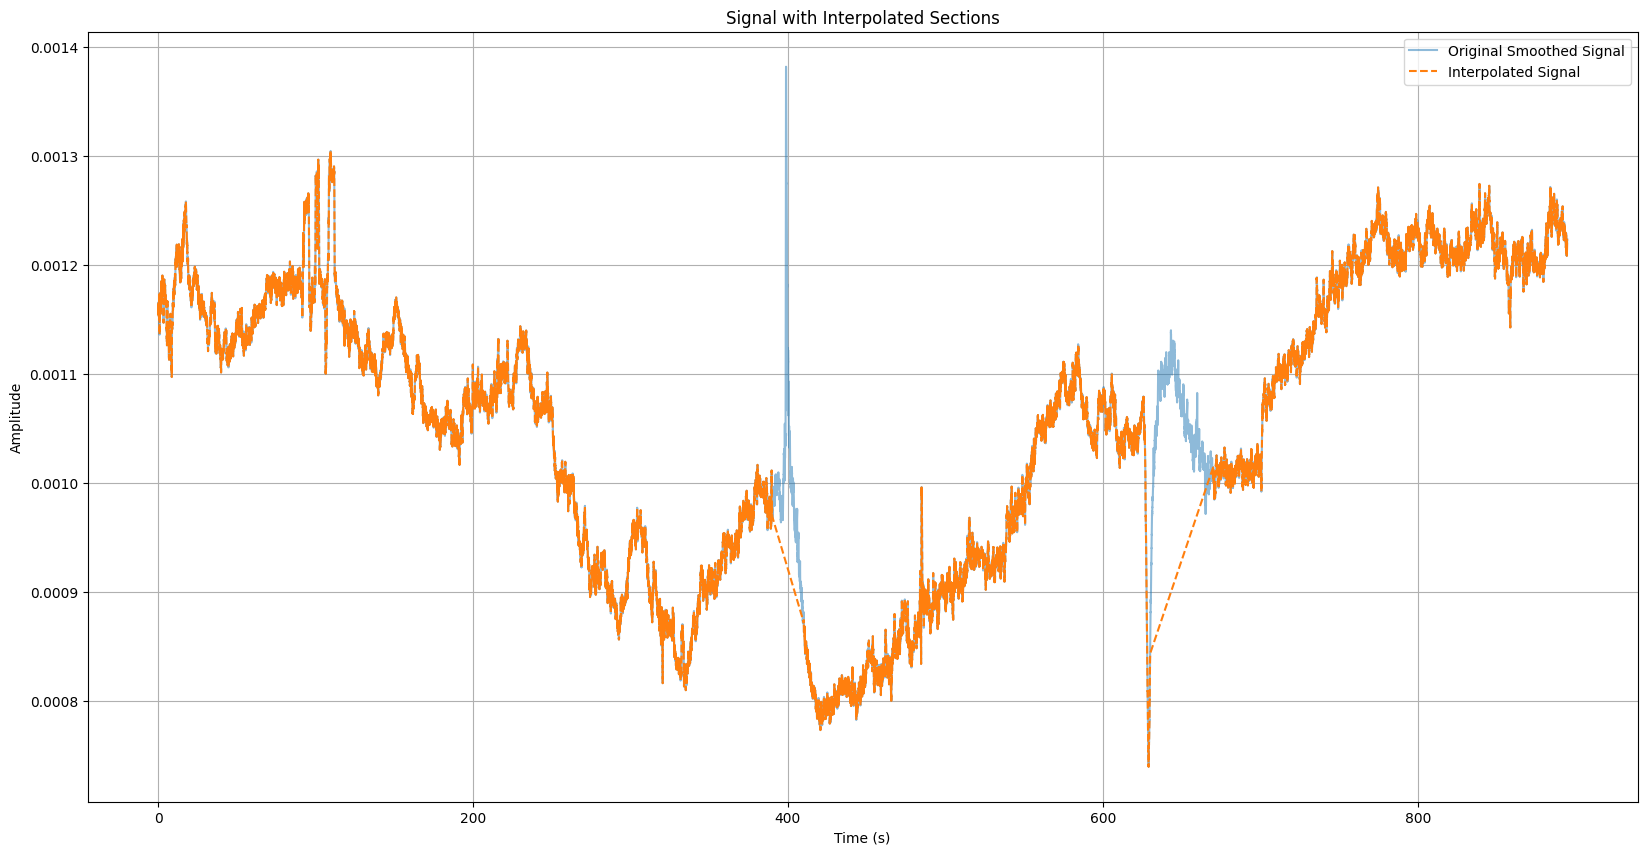

In [ ]:
from scipy.interpolate import interp1d

# Define the time ranges to be removed (in seconds)
remove_intervals = [(390, 410), (630, 670)]

# Convert these times to sample indices
remove_indices = []
for start, end in remove_intervals:
    start_index = int(start * fs)
    end_index = int(end * fs)
    remove_indices.append((start_index, end_index))

# Mask the intervals to be removed
masked_data = smoothed_data.copy()
for start_index, end_index in remove_indices:
    masked_data[start_index:end_index] = np.nan

# Interpolate over the NaN values
non_nan_indices = ~np.isnan(masked_data)
nan_indices = np.isnan(masked_data)

interpolator = interp1d(np.where(non_nan_indices)[0], masked_data[non_nan_indices], kind='linear', fill_value='extrapolate')
interpolated_data = interpolator(np.arange(len(masked_data)))

# Plot the data
plt.figure(figsize=(20, 10))

# Plot original smoothed signal
plt.plot(times[:len(smoothed_data)], smoothed_data, label='Original Smoothed Signal', alpha=0.5)

# Plot interpolated signal
plt.plot(times[:len(interpolated_data)], interpolated_data, label='Interpolated Signal', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with Interpolated Sections')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data, times = raw_f7[:]

# Get the number of samples
num_samples = data.shape[1]
print(f'Number of samples in the F7 channel: {num_samples}')

Number of samples in the F7 channel: 458240


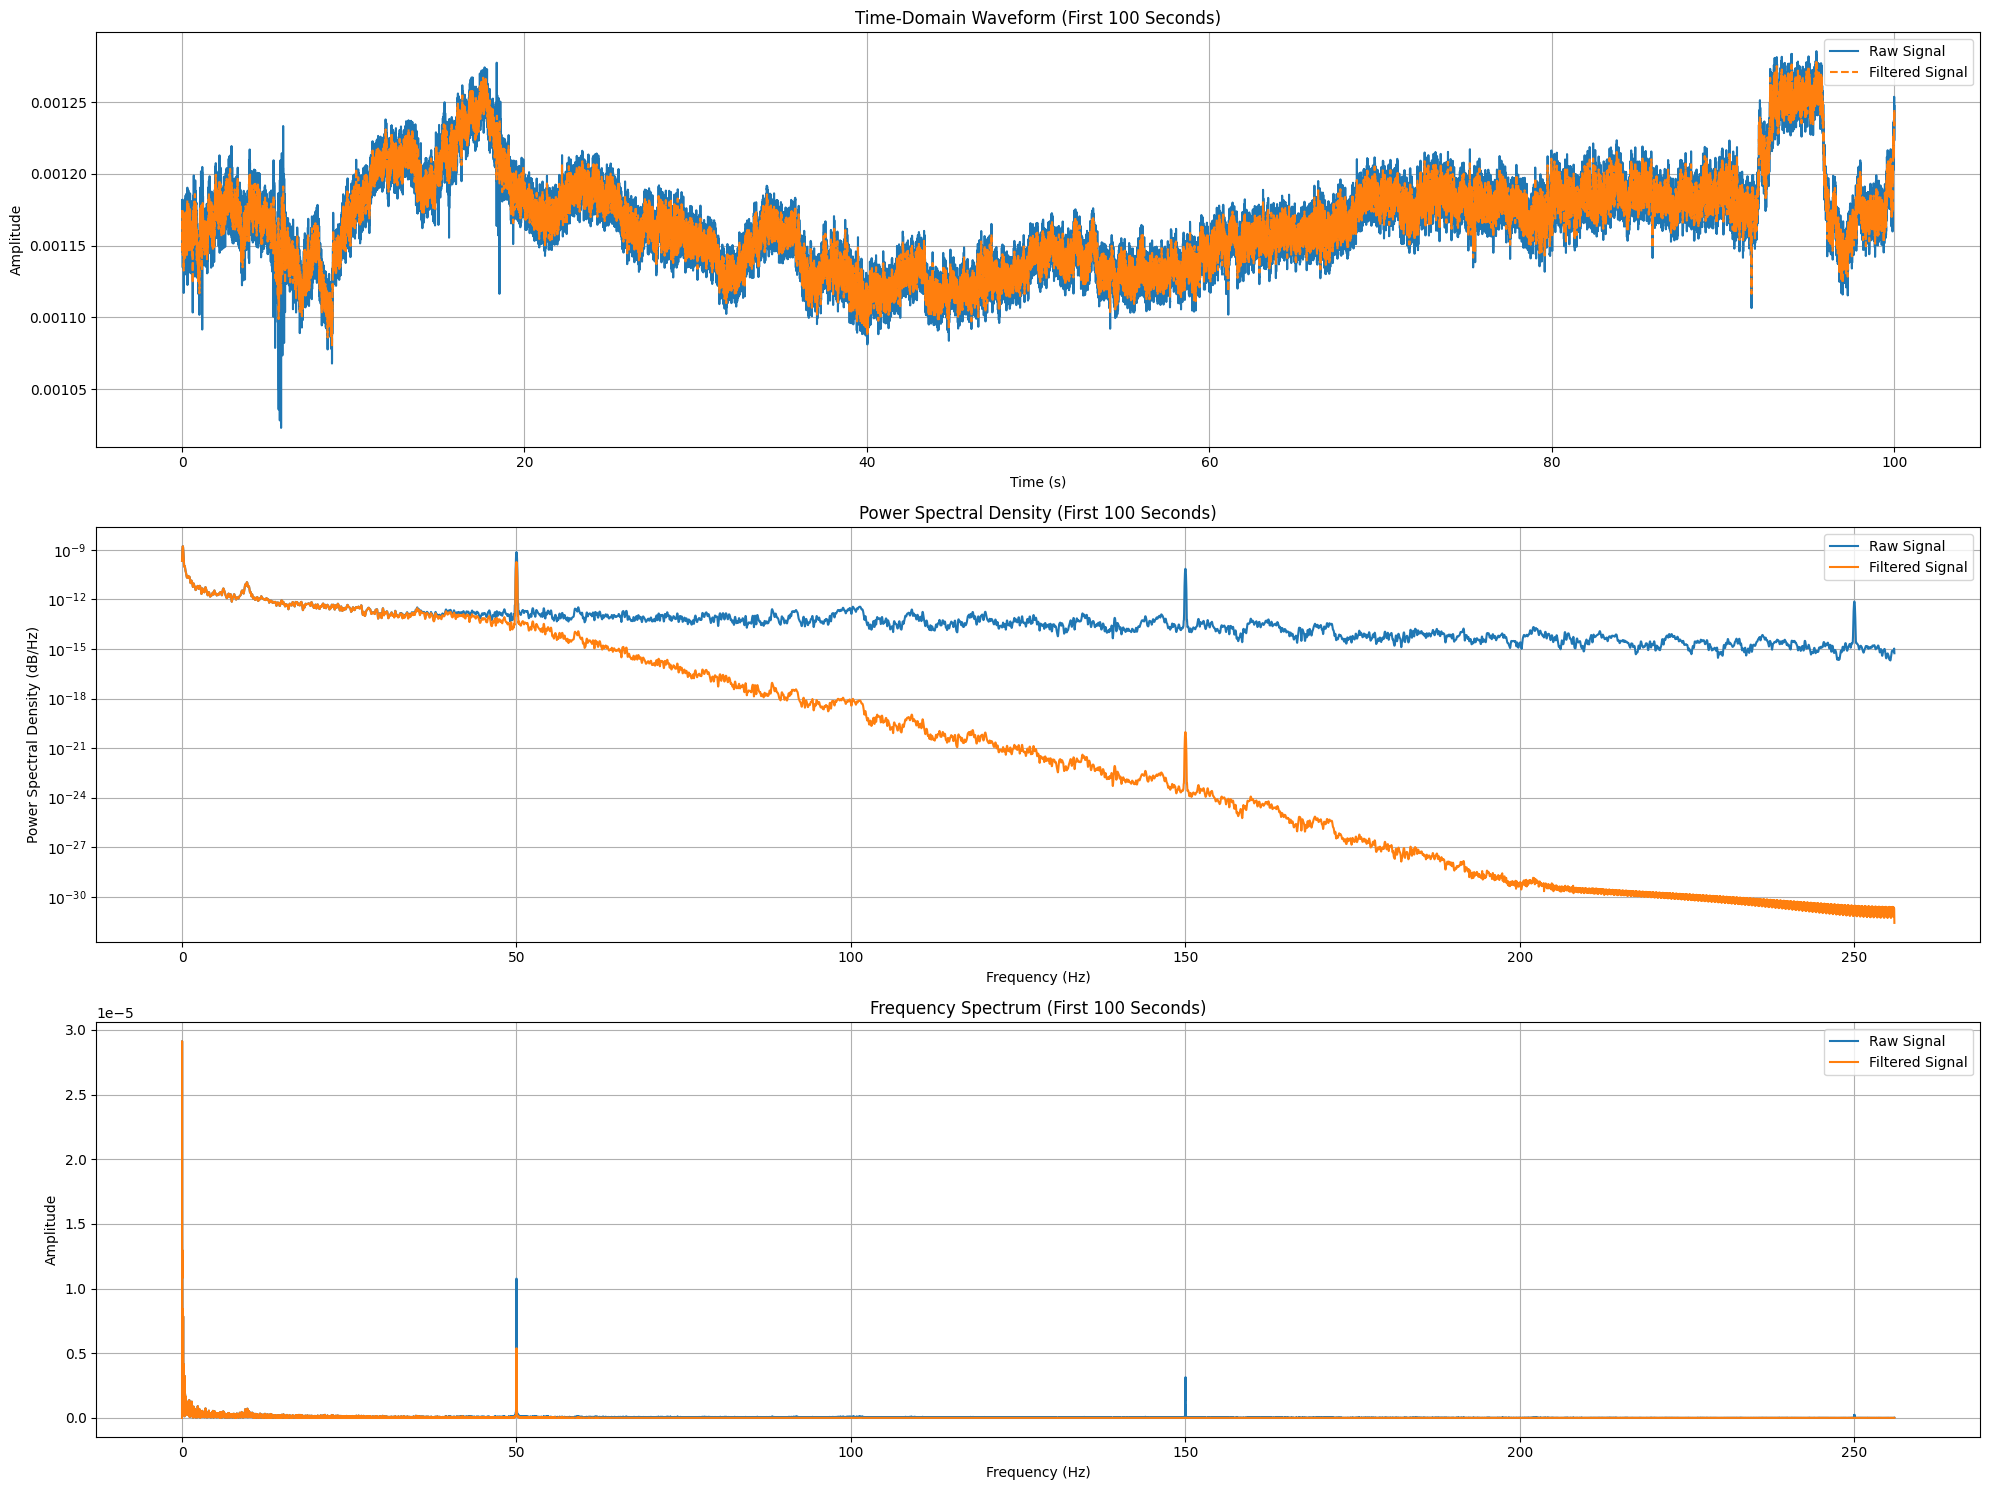

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch

# Parameters
segment_duration = 100  # Duration of the segment in seconds
fs = raw.info['sfreq']  # Sampling frequency

# Define the number of samples for 100 seconds
segment_samples = int(segment_duration * fs)

# Extract the first 100 seconds of data from F7 channel
data, times = raw_f7[:]
data_segment = data[0, :segment_samples]
times_segment = times[:segment_samples]

# Apply a 4th-order Butterworth low-pass filter
cutoff = 50  # Cutoff frequency in Hz
N = 4  # Filter order
b, a = butter(N, cutoff, fs=fs, btype='low', analog=False)
filtered_segment = filtfilt(b, a, data_segment)

# Function to compute FFT
def apply_fft(x, fs):
    N = len(x)
    T = 1.0 / fs
    fft_coef = np.fft.fft(x - np.mean(x))
    xf = np.fft.fftfreq(N, T)[:N // 2]
    fft_positive = 2.0 / N * np.abs(fft_coef[:N // 2])
    return xf, fft_positive

# Function to compute PSD
def compute_psd(signal, fs):
    seg_length = len(signal) // 10
    nfft_length = max(2**14, seg_length)  # Ensure nfft is at least as large as seg_length
    frequencies, psd = welch(signal, fs=fs, window='hann', nperseg=seg_length, nfft=nfft_length)
    return frequencies, psd

# Compute PSD and FFT for raw and filtered segments
f_psd_raw, psd_raw = compute_psd(data_segment, fs)
f_psd_filtered, psd_filtered = compute_psd(filtered_segment, fs)
f_fft_raw, fft_raw = apply_fft(data_segment, fs)
f_fft_filtered, fft_filtered = apply_fft(filtered_segment, fs)

# Plotting
plt.figure(figsize=(20, 15))

# Time-domain waveform
plt.subplot(3, 1, 1)
plt.plot(times_segment, data_segment, label='Raw Signal')
plt.plot(times_segment, filtered_segment, label='Filtered Signal', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Waveform (First 100 Seconds)')
plt.legend()
plt.grid(True)

# PSD
plt.subplot(3, 1, 2)
plt.semilogy(f_psd_raw, psd_raw, label='Raw Signal')
plt.semilogy(f_psd_filtered, psd_filtered, label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density (First 100 Seconds)')
plt.legend()
plt.grid(True)

# Frequency spectrum
plt.subplot(3, 1, 3)
plt.plot(f_fft_raw, fft_raw, label='Raw Signal')
plt.plot(f_fft_filtered, fft_filtered, label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (First 100 Seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


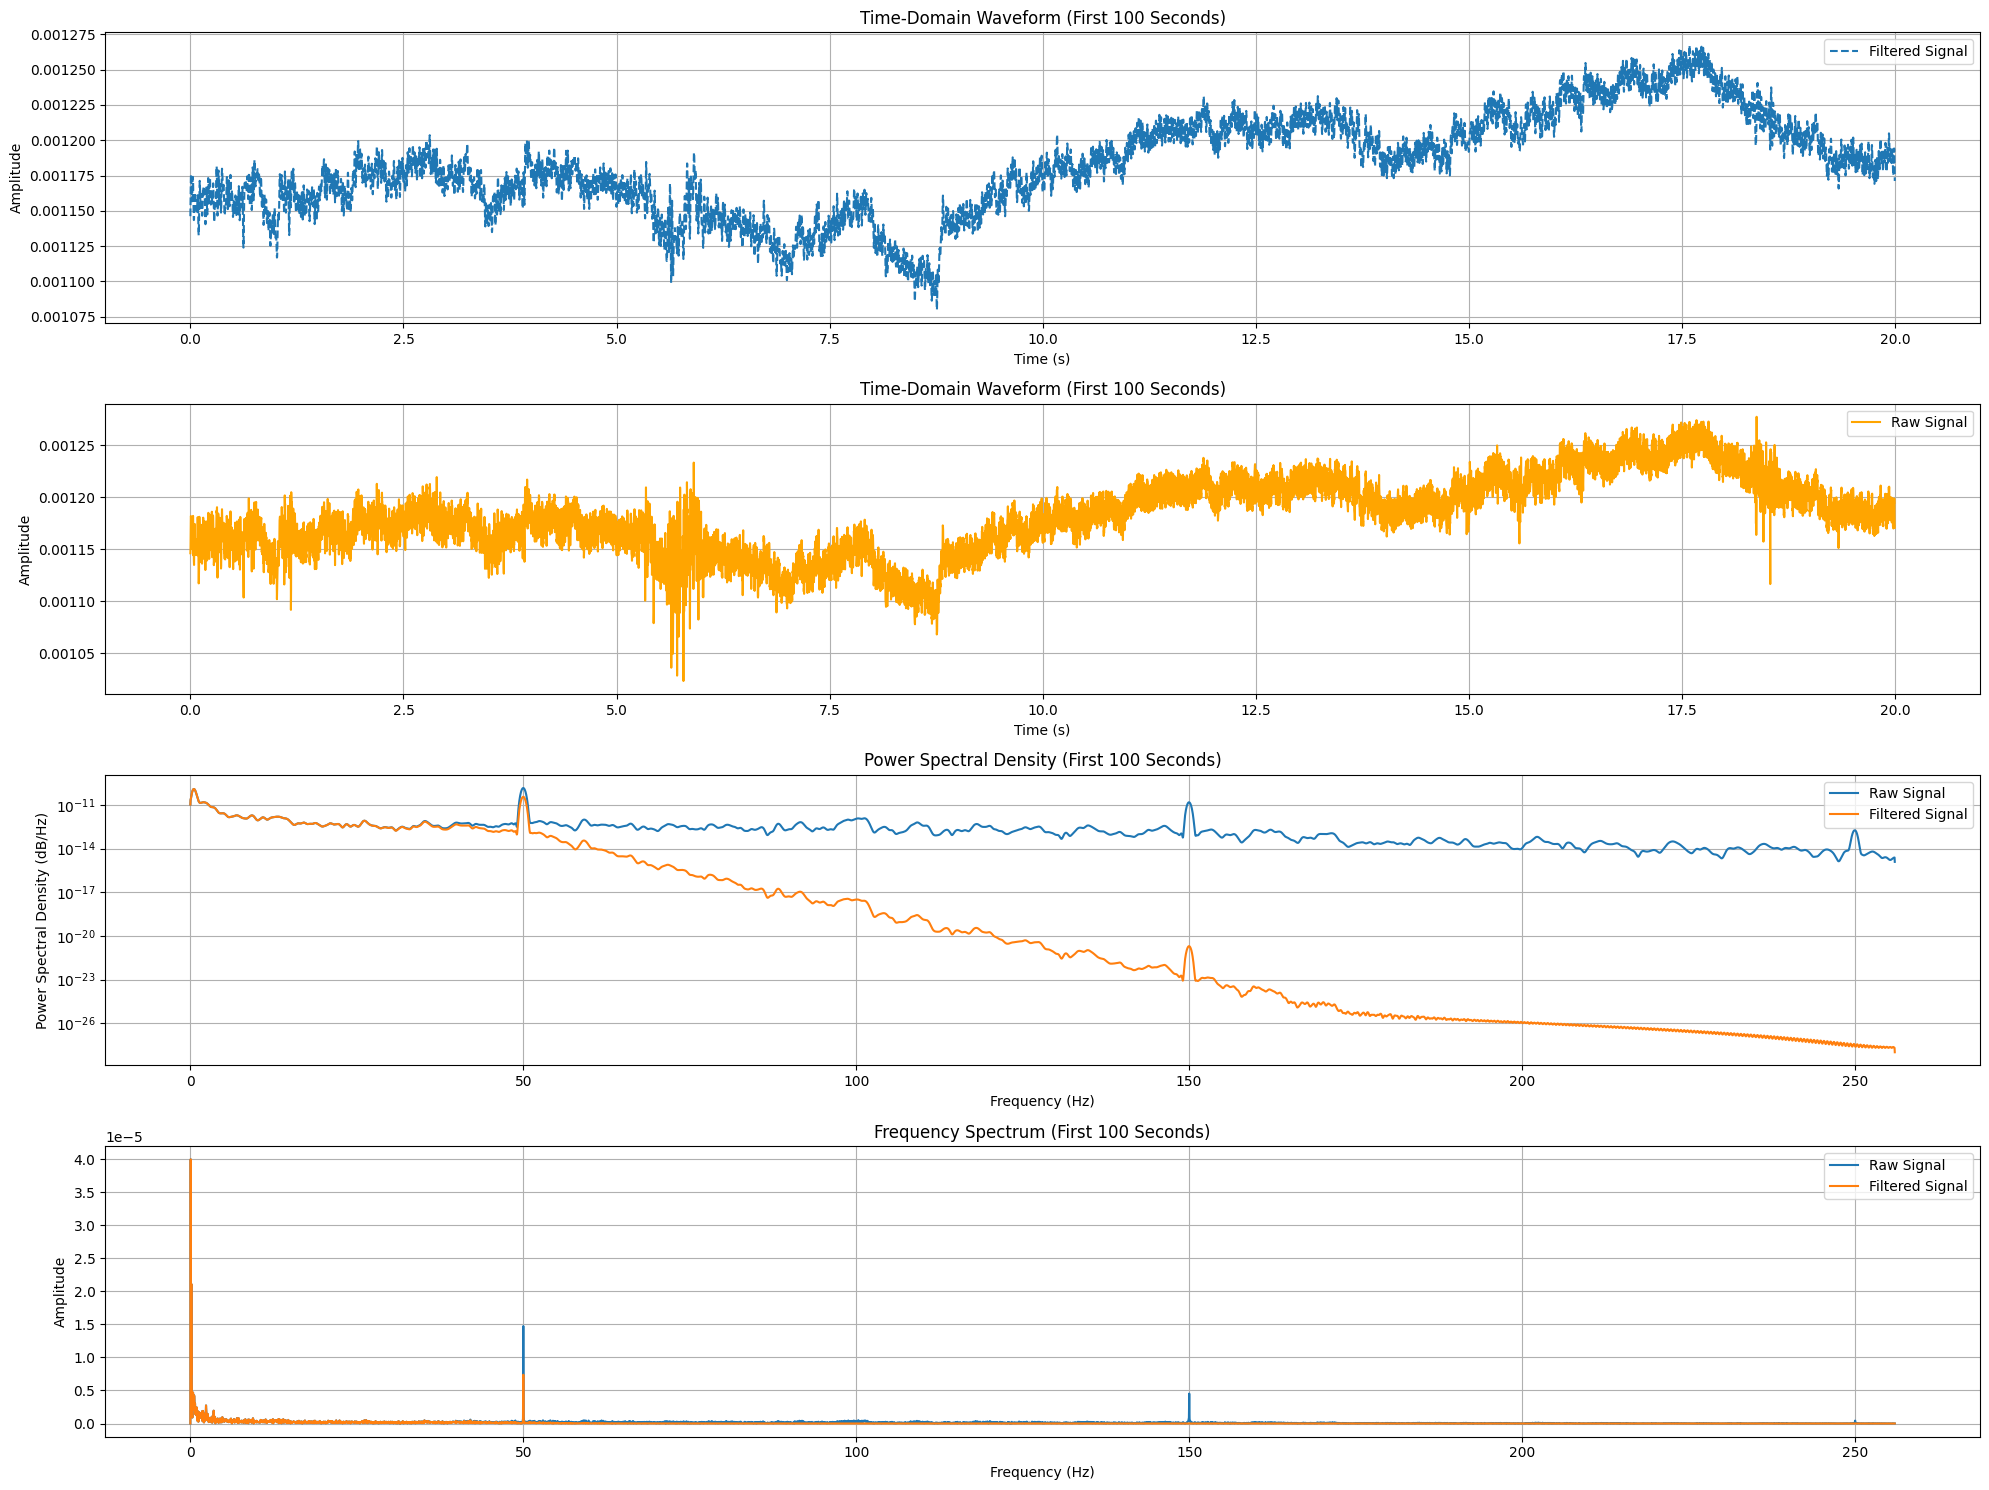

In [ ]:


# Parameters
segment_duration = 20  # Duration of the segment in seconds
fs = raw.info['sfreq']  # Sampling frequency

# Define the number of samples for 100 seconds
segment_samples = int(segment_duration * fs)

# Extract the first 100 seconds of data from F7 channel
data, times = raw_f7[:]
data_segment = data[0, :segment_samples]
times_segment = times[:segment_samples]

# Apply a 4th-order Butterworth low-pass filter
cutoff = 50  # Cutoff frequency in Hz
N = 4  # Filter order
b, a = butter(N, cutoff, fs=fs, btype='low', analog=False)
filtered_segment = filtfilt(b, a, data_segment)

# Function to compute FFT
def apply_fft(x, fs):
    N = len(x)
    T = 1.0 / fs
    fft_coef = np.fft.fft(x - np.mean(x))
    xf = np.fft.fftfreq(N, T)[:N // 2]
    fft_positive = 2.0 / N * np.abs(fft_coef[:N // 2])
    return xf, fft_positive

# Function to compute PSD
def compute_psd(signal, fs):
    seg_length = len(signal) // 10
    nfft_length = max(2**14, seg_length)  # Ensure nfft is at least as large as seg_length
    frequencies, psd = welch(signal, fs=fs, window='hann', nperseg=seg_length, nfft=nfft_length)
    return frequencies, psd

# Compute PSD and FFT for raw and filtered segments
f_psd_raw, psd_raw = compute_psd(data_segment, fs)
f_psd_filtered, psd_filtered = compute_psd(filtered_segment, fs)
f_fft_raw, fft_raw = apply_fft(data_segment, fs)
f_fft_filtered, fft_filtered = apply_fft(filtered_segment, fs)

# Plotting
plt.figure(figsize=(20, 15))

# Time-domain waveform
plt.subplot(4, 1, 1)
#plt.plot(times_segment, data_segment, label='Raw Signal')
plt.plot(times_segment, filtered_segment, label='Filtered Signal', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Waveform (First 100 Seconds)')
plt.legend()
plt.grid(True)


plt.subplot(4, 1, 2)
plt.plot(times_segment, data_segment, label='Raw Signal', color = 'orange')
#plt.plot(times_segment, filtered_segment, label='Filtered Signal', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Waveform (First 100 Seconds)')
plt.legend()
plt.grid(True)
# PSD
plt.subplot(4, 1, 3)
plt.semilogy(f_psd_raw, psd_raw, label='Raw Signal')
plt.semilogy(f_psd_filtered, psd_filtered, label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density (First 100 Seconds)')
plt.legend()
plt.grid(True)

# Frequency spectrum
plt.subplot(4, 1, 4)
plt.plot(f_fft_raw, fft_raw, label='Raw Signal')
plt.plot(f_fft_filtered, fft_filtered, label='Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (First 100 Seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


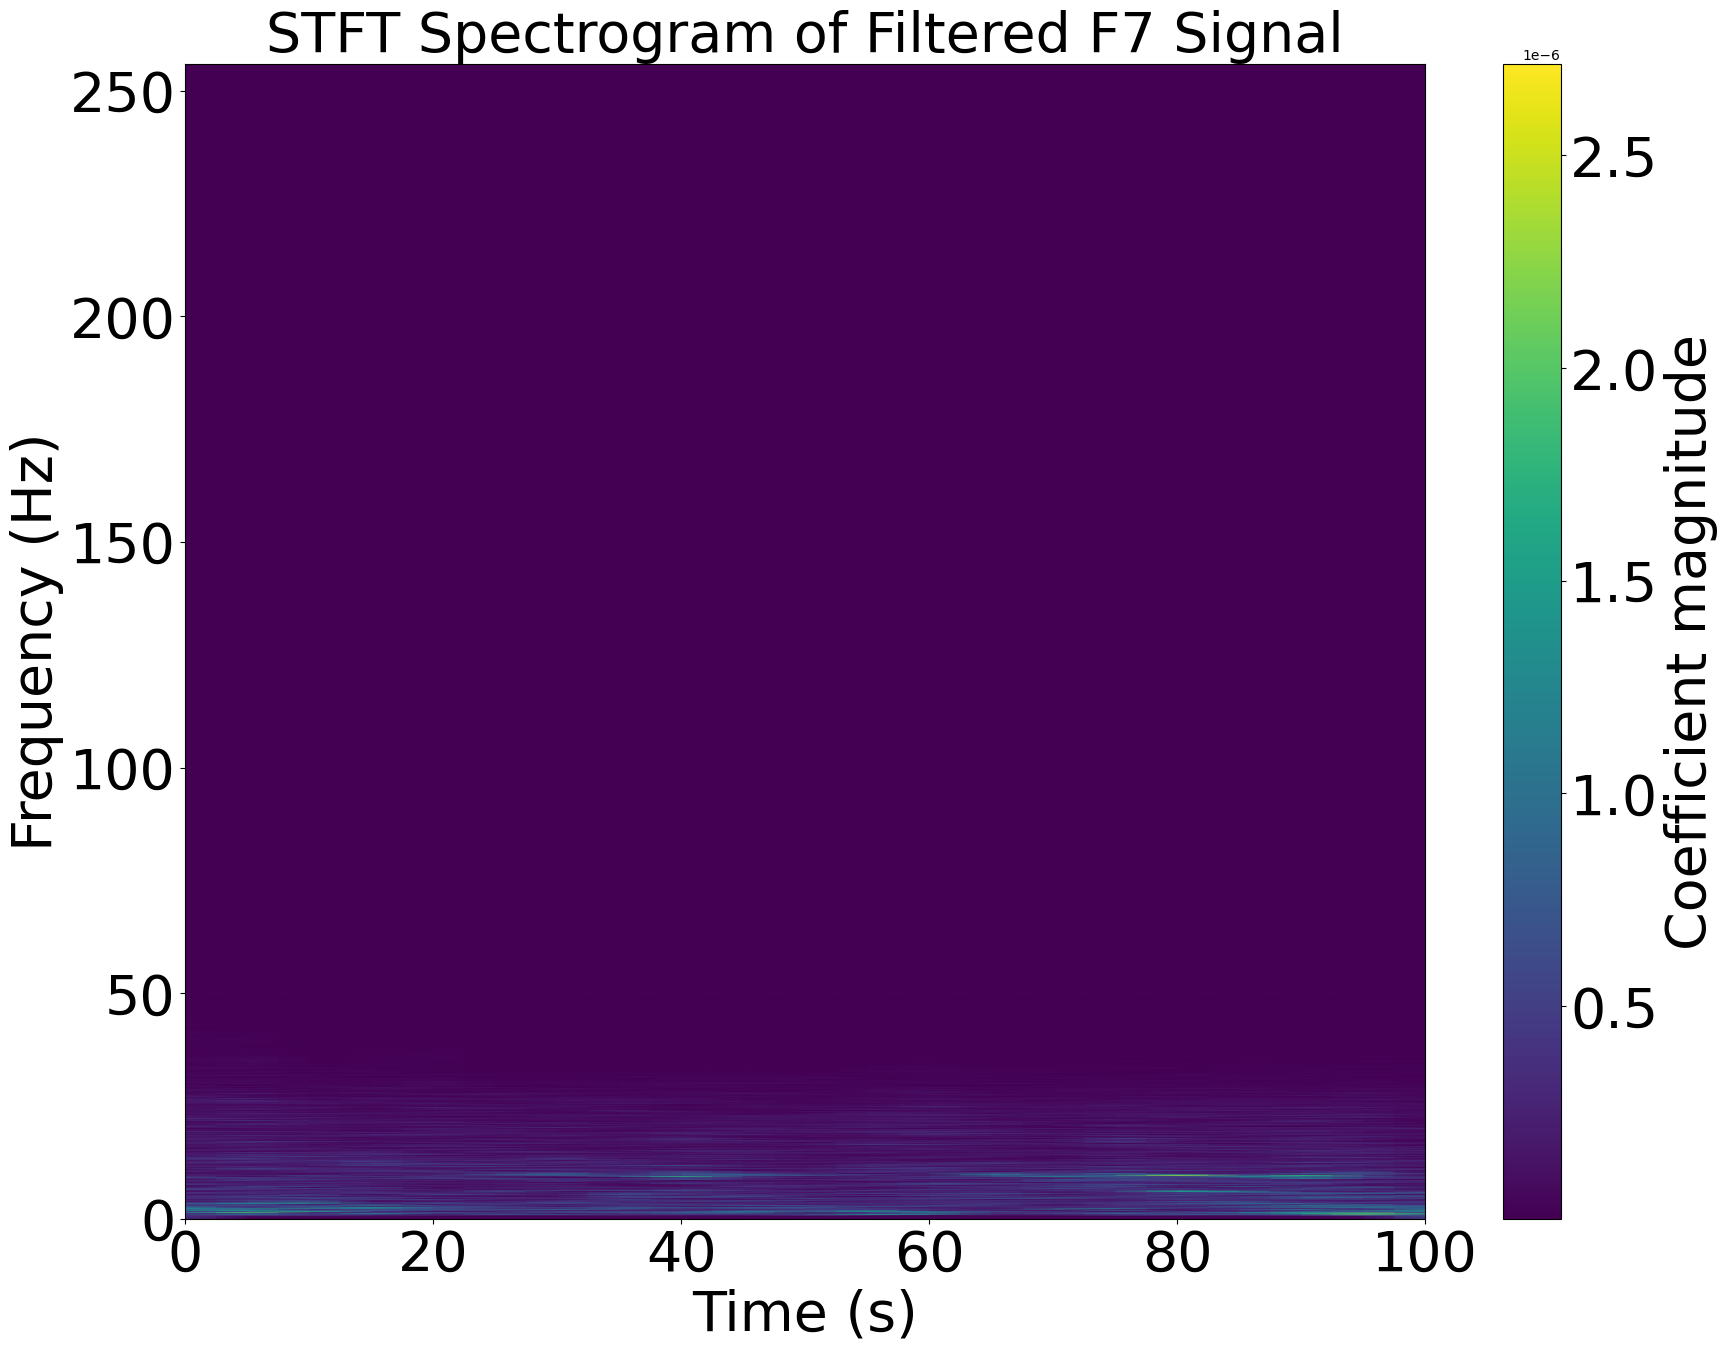

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft

# Parameters
fs = raw.info['sfreq']  # Sampling frequency of the EEG data

# Extract the F7 channel data
f7_data = raw.copy().pick_channels(['F7']).get_data()[0]

# Smoothing Parameters
N = 4  # Filter order for smoothing
lowcut = 1.0  # Low cut-off frequency in Hz for smoothing
highcut = 50.0  # High cut-off frequency in Hz for smoothing

# Design the Butterworth bandpass filter for smoothing
b, a = butter(N, [lowcut, highcut], fs=fs, btype='band')
smoothed_f7 = filtfilt(b, a, f7_data)

# Low-Pass Butterworth Filter Parameters
lpf_order = 4  # Filter order
lpf_cutoff = 30.0  # Cut-off frequency in Hz for low-pass filter

# Design the Butterworth low-pass filter
b_lpf, a_lpf = butter(lpf_order, lpf_cutoff, fs=fs, btype='low')
filtered_f7 = filtfilt(b_lpf, a_lpf, smoothed_f7)

# Define segment duration and extract the first 100 seconds
segment_duration = 100  # Duration in seconds
segment_samples = int(segment_duration * fs)
data_segment = filtered_f7[:segment_samples]

# STFT Parameters
seg_len = len(data_segment) // 10  # Segment length
overlap = 0.5 * seg_len  # 50% overlap
fft_length = max(seg_len, 2048)
win = 'hamming'  # Window function

# Compute STFT
f_stft, times, Zxx = stft(data_segment, fs=fs, window=win, nperseg=seg_len, noverlap=overlap, nfft=fft_length)

# Plotting the STFT Spectrogram
plt.figure(figsize=(20, 15))
plt.pcolormesh(times, f_stft, np.abs(Zxx), shading='gouraud')
plt.title('STFT Spectrogram of Filtered F7 Signal', fontsize=40)
plt.ylabel('Frequency (Hz)', fontsize=40)
plt.xlabel('Time (s)', fontsize=40)
cb = plt.colorbar()
cb.set_label(label='Coefficient magnitude', size=40)
cb.ax.tick_params(labelsize=40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=40)
plt.show()
